<span style="font-size: 35px; color: Green;font-family: 'Times New Roman', Times, serif;">Data Understanding.</span>
<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Read CSV into a Pandas object</span>

In [292]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import warnings


data = pd.read_csv('data/coupons.csv')
data.shape

(12684, 26)

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<span style="font-size: 35px; color: Green;font-family: 'Times New Roman', Times, serif;">Investigate the dataset.</span>
<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Rename Columns</span> 

In [294]:
data=data.rename(columns={'passanger': 'passenger'})

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Check for Null/NaN rows</span>


In [295]:
data.isnull().sum()

destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Check for duplicate rows</span>

In [296]:
data.loc[data.duplicated()]

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Decide what to do about your missing data </span>
<ul style="font-size: 17px; color: black; font-family: 'Times New Roman', Times, serif; list-style-type: disc; padding-left: 0; margin-left: 25px;">
  <li>We will drop car column as it has 99% of empty values relative to the whole dataset</li>
  <li>We will drop all duplicated rows</li>
</ul>

In [297]:
# print(data["car"].value_counts().idxmax())

CarNAPerct = (data['car'].isnull().sum() / data.shape[0])*100 
print(f"Car null values are {CarNAPerct:.2f}% of the whole dataset. Huge chunk of null data, drop column")

BarNAPerct = (data['Bar'].isnull().sum() / data.shape[0])*100 
print(f"Bar null values are {BarNAPerct:.2f}% of the whole dataset.Manageable null data, drop rows")

CoffeeHouseNAPerct = (data['CoffeeHouse'].isnull().sum() / data.shape[0])*100 
print(f"Coffee House null values are {CoffeeHouseNAPerct:.2f}% of the whole dataset. Manageable null data, drop rows")

CarryAwayNAPerct = (data['CarryAway'].isnull().sum() / data.shape[0])*100 
print(f"CarryAway null values are {CarryAwayNAPerct:.2f}% of the whole dataset. Manageable null data, drop rows")

RestLT20NAPerct = (data['RestaurantLessThan20'].isnull().sum() / data.shape[0])*100 
print(f"Restaurant <20% null values are {RestLT20NAPerct:.2f}% of the whole dataset. Manageable null data, drop rows")

Rest20_50NAPerct = (data['Restaurant20To50'].isnull().sum() / data.shape[0])*100 
print(f"Restaurance 20-50% null values are {Rest20_50NAPerct:.2f}% of the whole dataset. Manageable null data, drop rows")

Car null values are 99.15% of the whole dataset. Huge chunk of null data, drop column
Bar null values are 0.84% of the whole dataset.Manageable null data, drop rows
Coffee House null values are 1.71% of the whole dataset. Manageable null data, drop rows
CarryAway null values are 1.19% of the whole dataset. Manageable null data, drop rows
Restaurant <20% null values are 1.02% of the whole dataset. Manageable null data, drop rows
Restaurance 20-50% null values are 1.49% of the whole dataset. Manageable null data, drop rows


In [298]:
data= data.drop(columns=['car'])  # Drop Car Column  
data = data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50']) # Drop all rows that have empty values for Bar, CoffeeHouse, CarryAway,RestaurantLessThan20,Restaurant20To50
data.shape

(12079, 25)

In [299]:
data= data.drop_duplicates() # Drop Duplicates
data.loc[data.duplicated()]
data.shape

(12007, 25)

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">What proportion of the total observations chose to accept the coupon?</span>  

In [300]:
print(f"Proportion of total accepted coupons is {data["Y"].mean()}")

Proportion of total accepted coupons is 0.5684184225868244


<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Use a bar plot to visualize the coupon column</span> 

In [301]:
coupon_cnts = data["coupon"].value_counts().reset_index()
coupon_cnts.columns = ["Coupon type", "Count of coupons"]  # Rename columns for clarity

# Plotting with Plotly Express
fig = px.bar(coupon_cnts, x="Coupon type", y="Count of coupons", title="Coupon Counts", color="Coupon type") 
fig.update_layout(width=700, height =500, title ="Coupon Column Visualization") 
fig.show() 

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">Use a histogram to visualize the temperature column.</span> 

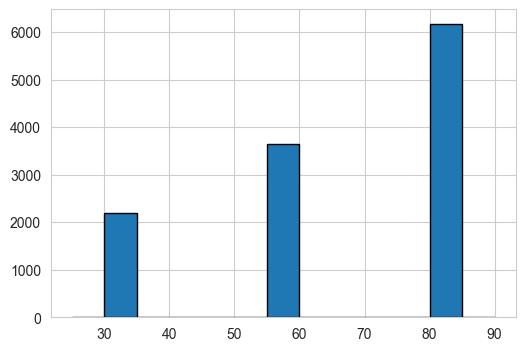

In [302]:
plt.figure(figsize=(6,4))
_, _, _ = plt.hist(data["temperature"], bins=[25,30,35,40,45,50,55,60,65,70,75,80,85,90], edgecolor='black')


<span style="font-size: 40px; color: green;font-family: 'Times New Roman', Times, serif;">Investigating the Bar Coupons</span>
<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">1.Create a new dataFrame that contains just the bar coupons.</span> 

In [303]:
df_BarCouponsOnly = data.query('coupon =="Bar"')
df_BarCouponsOnly

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">2.What proportion of bar coupons were accepted?</span> 

In [304]:
df_acceptedBarCoupons = data.query('coupon=="Bar"')
df_acceptedBarCoupons['Y'].mean()  
print(f"Proportion of accepted bar coupons is {df_acceptedBarCoupons['Y'].mean()}")

Proportion of accepted bar coupons is 0.4118572927597062


<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.</span>  


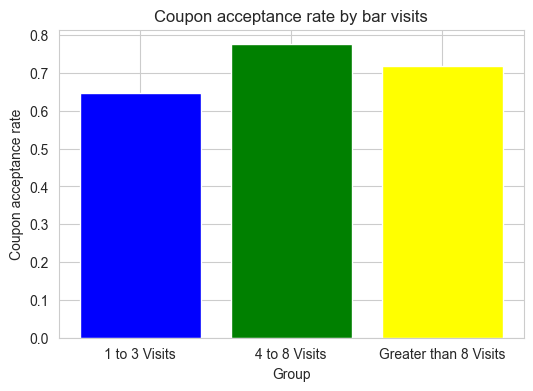

Bar1To3 is :0.65
Bar4To8 is :0.78
Bargt8  is: 0.72


In [305]:
df_Bar1To3AcceptanceRate= data.query('Bar=="1~3" and coupon =="Bar"')['Y'].mean()
df_Bar4To8AcceptanceRate= data.query('Bar=="4~8" and coupon =="Bar"')['Y'].mean()
df_Bargt8AcceptanceRate= data.query('Bar=="gt8" and coupon =="Bar"')['Y'].mean()

rates = [df_Bar1To3AcceptanceRate, df_Bar4To8AcceptanceRate, df_Bargt8AcceptanceRate]
group_labels = ['1 to 3 Visits', '4 to 8 Visits', 'Greater than 8 Visits']

plt.figure(figsize=(6,4))
plt.bar(group_labels, rates, color=['blue','green','yellow'] )
plt.title ('Coupon acceptance rate by bar visits')
plt.xlabel('Group')
plt.ylabel('Coupon acceptance rate')

plt.show()
print(f"Bar1To3 is :{df_Bar1To3AcceptanceRate:.2f}\nBar4To8 is :{df_Bar4To8AcceptanceRate:.2f}\nBargt8  is: {df_Bargt8AcceptanceRate:.2f}")

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?</span>  


Bar visits for more than once and age is >25 is :0.69
Rest is :0.56


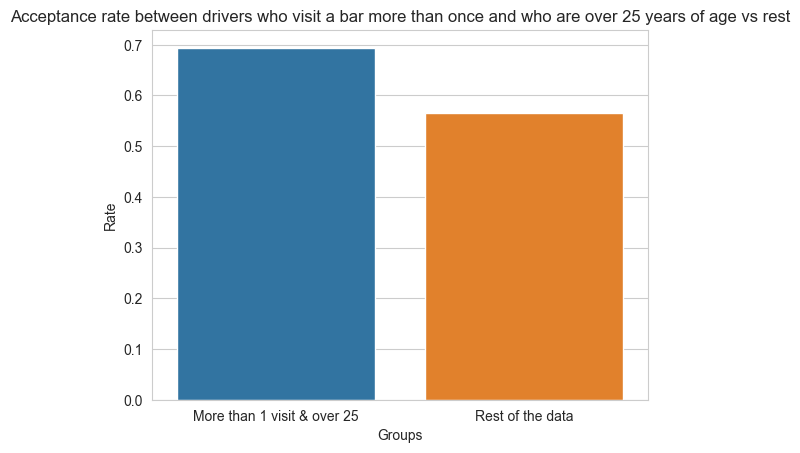

In [306]:
data['age']=pd.to_numeric(data['age'],errors ='coerce').astype('Int64') # Convert Age to Integer

# The below snippet extracts a dataframe from master dataframe where coupon=Bar, Bar visits are at least once/month and age >25
df_BarMoreThan1Visit_Over25_Cnts = data.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and (age > 25)  and (coupon=="Bar")')  
df_BarMoreThan1Visit_Over25_Cnts["Y"].mean()

# The below snippet extracts a dataframe from master dataframe that don't match the criteria (coupon=Bar, Bar visits are at least once/month and age >25)
df_AllOthers = data[~data.index.isin(df_BarMoreThan1Visit_Over25_Cnts.index)]
df_AllOthers["Y"].mean()

# Create a dataframe in preparation for a plot
df_plot = pd.DataFrame({'Groups': ["More than 1 visit & over 25","Rest of the data"],
                        'Rate':[df_BarMoreThan1Visit_Over25_Cnts["Y"].mean(),df_AllOthers["Y"].mean()]
                       })

#Plot the graph
sns.barplot(data=df_plot, x="Groups", y="Rate", hue = 'Groups')
plt.title("Acceptance rate between drivers who visit a bar more than once and who are over 25 years of age vs rest");

print(f"Bar visits for more than once and age is >25 is :{df_BarMoreThan1Visit_Over25_Cnts["Y"].mean():.2f}\nRest is :{df_AllOthers["Y"].mean():.2f}")

#---------------------------------------------------------------------------------------------------------------------------------------------
# data['is_first_group'] = (data['Bar'].isin(["1~3", "4~8", "gt8"])) & (data['age'] > 25) & (data['coupon']=="Bar")
# data[data['is_first_group']][['Bar','coupon','age', 'Y']]# Only Bar Data = 340 rows (w/104 zeroes and 236 1s when boolean flag is applied 
# acceptance_rate_first_group = data[data['is_first_group']]['Y'].mean()
# acceptance_rate_first_group #0.6941

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. </span>  


In [307]:
data.head(5)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


Bar visits for more than once, no kid passenger, and other profession is :0.71
Rest is :0.56


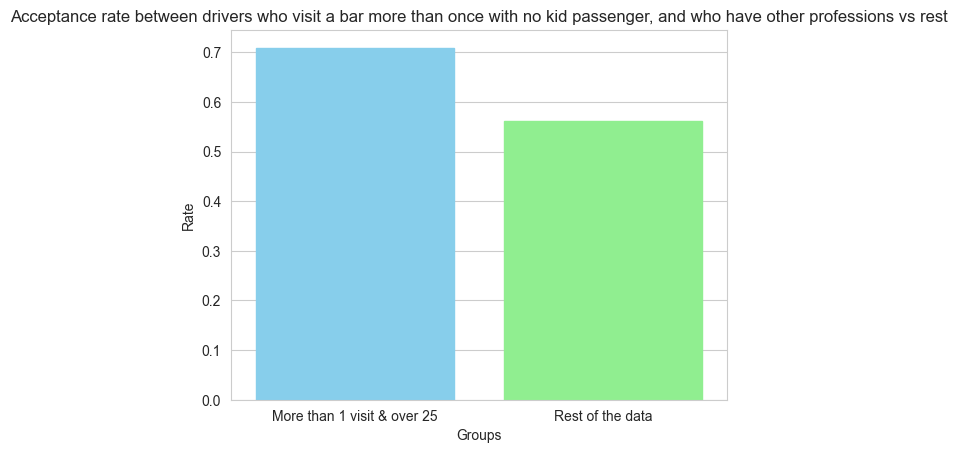

In [308]:
#The below snippet extracts a dataframe from master dataframe where coupon=Bar, Bar visits are at least once/month, without kids as passengers, and occupation that is not Farming, Fishing, & Forestry
df_Cnts = data.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and (passenger !="Kid(s)")  and (occupation!="Farming Fishing & Forestry") and (coupon=="Bar")')  
df_Cnts["Y"].mean()

# The below snippet extracts a dataframe from master dataframe that don't match the criteria (coupon=Bar, Bar visits are at least once/month without kids as passengers, and occupation that is not Farming, Fishing, & Forestry)
df_AllOthers = data[~data.index.isin(df_Cnts.index)]
df_AllOthers["Y"].mean()

# Create a dataframe in preparation for a plot
df_plot = pd.DataFrame({'Groups': ["More than 1 visit & over 25","Rest of the data"],
                        'Rate':[df_Cnts["Y"].mean(),df_AllOthers["Y"].mean()]
                       }) 
#Plot the graph 
ax = sns.barplot(data=df_plot, x="Groups", y="Rate", hue = 'Groups')
colors = ["skyblue", "lightgreen"]

for bar, color in zip(ax.patches, colors):
    bar.set_color(color)
    
plt.title("Acceptance rate between drivers who visit a bar more than once with no kid passenger, and who have other professions vs rest");

print(f"Bar visits for more than once, no kid passenger, and other profession is :{df_Cnts["Y"].mean():.2f}\nRest is :{df_AllOthers["Y"].mean():.2f}")

<div style="font-size: 20px; color: red; font-family: 'Times New Roman', Times, serif;">
6. Compare the acceptance rates between those drivers who:<br>
<ul> 
<li>go to bars more than once a month, had passengers that were not a kid, and were not widowed<br></li>
<li>go to bars more than once a month and are under the age of 30<br></li>
<li>go to cheap restaurants more than 4 times a month and income is less than 50K</li>
    </ul>
</div>


Bar visits for more than once, no kid passenger, and other profession is :0.71
Rest is :0.56


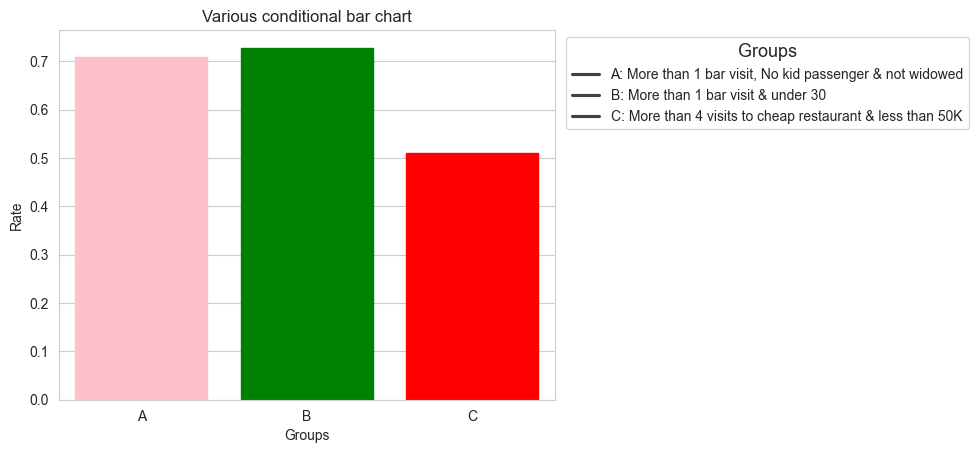

In [311]:
# The below snippet extracts a dataframe from master dataframe that don't match the criteria (coupon=Bar, Bar visits are at least once/month, and not widowed)
df_Cnts1 = data.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and (passenger !="Kid(s)") and (maritalStatus!="Widowed") and (coupon=="Bar")')  
df_Cnts1["Y"].mean()

# The below snippet extracts a dataframe from master dataframe that don't match the criteria (coupon=Bar, Bar visits are at least once/month, and under 30)
df_Cnts2 = data.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and (passenger !="Kid(s)") and (age<30) and (coupon=="Bar")')  
df_Cnts2["Y"].mean()

# The below snippet extracts a dataframe from master dataframe that don't match the criteria (coupon=Bar, cheap rest. visits are at least 4 times/month, and income <$50K)
df_Cnts3 = data.query('(RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8") and (income=="$37500 - $49999") and (coupon=="Bar")')  
df_Cnts3["Y"].mean()


# Create a dataframe in preparation for a plot
df_plot = pd.DataFrame({'Groups':["A","B","C"],
                        'Rate':[df_Cnts1["Y"].mean(),df_Cnts2["Y"].mean(),df_Cnts3["Y"].mean()]
                       }) 
 
#Plot the graph 
ax = sns.barplot(data=df_plot, x="Groups", y="Rate", hue = 'Groups')
colors = ["Pink", "green", "red"]

for bar, color in zip(ax.patches, colors):
    bar.set_color(color)  
plt.title("Various conditional bar chart")

legend_labels = ['A: More than 1 bar visit, No kid passenger & not widowed',
                 'B: More than 1 bar visit & under 30',
                 'C: More than 4 visits to cheap restaurant & less than 50K']
plt.legend(legend_labels, title="Groups", title_fontsize='13', loc='upper right', bbox_to_anchor=(1.85, 1));

print(f"Bar visits for more than once, no kid passenger, and other profession is :{df_Cnts["Y"].mean():.2f}\nRest is :{df_AllOthers["Y"].mean():.2f}")

<span style="font-size: 20px; color: red;font-family: 'Times New Roman', Times, serif;">7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons? </span>  

1. Overall, drivers that go to a bar for more than 3 times a month are more likely to accept the coupon.
2. Younger drivers (between 25 and 30) are also likely to accept coupons.
3. Equally likely are drivers who frequent a bar more than 8 times in a month.

### Independent Investigation
Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  